# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Sutan Arsyah Nugraha
- **Email:** arsasaja2@gmail.com
- **ID Dicoding:** aarsyah0

## Menentukan Pertanyaan Bisnis

1. Wilayah Mana yang Memiliki Pelanggan dengan Total Pengeluaran Tertinggi?
2. Bagaimana Performa Kategori Produk Berdasarkan Nilai Pesanan dan Skor Ulasan?
3. Apa Saja Kota dengan Penjual Terbanyak dan Bagaimana Kinerja Mereka?
4. Bagaimana Kinerja Pengiriman Pesanan di Berbagai Wilayah?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# Importing libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
import seaborn as sns
import geopandas as gpd
from scipy import stats
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')


Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
data_dir = "drive/MyDrive/data/"

orders = pd.read_csv(data_dir + 'orders_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

In [ ]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
data['geo'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.55,-46.62,sao paulo,SP
1,1046,-23.55,-46.66,sao paulo,SP
2,1046,-23.55,-46.66,sao paulo,SP
3,1041,-23.55,-46.62,sao paulo,SP
4,1035,-23.55,-46.66,sao paulo,SP


In [ ]:
data['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
data['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
data['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
data['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [ ]:
for df_name, df in data.items():
    print('\n', df_name, '\n', df.info(), '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 orders 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650

In [ ]:
duplicate_counts = {}
total_sample_counts = {}

# Calculate duplicate counts and total samples for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames
duplicates_summary = pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)
print("\nDuplicate Counts and Total Sample Counts:\n", duplicates_summary)



Duplicate Counts and Total Sample Counts:
            Total Sample Count  Duplicate Count
orders                  99441                0
items                  112650                0
products                32951                0
payments               103886                0
reviews                 99224                0
customers               99441                0
sellers                  3095                0
geo                   1000163           914718
category                   71                0


In [ ]:
null_counts = {}

# Calculate and store null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(f"\nNull Values in {df_name}:\n{null_counts[df_name]}\n")


Null Values in orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Null Values in items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Null Values in products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Null Values in payments:
order_id                0
payment_sequential      0
payment_type          

### Cleaning Data

#### 1.3.1 Order

In [ ]:
# Selecting only delivered orders
print(data['orders']['order_status'].value_counts())

print('Taking only delivered orders we still get ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

# Get all order_id where the order status was not delivered
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# Filter out these orders from all relevant DataFrames
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace=True)

# Checking for NaNs in each dataset after filtering
for key, value in data.items():
    for col in value.columns:
        if value[col].isnull().sum():
            print(f"{col} (%): {round((value[col].isnull().sum()/len(value))*100,2)}")

# Deal with NaNs in orders
print('There are only ' + str(data['orders'].order_delivered_customer_date.isnull().sum()) +
      ' orders that are missing delivery dates.')

# Drop orders with missing delivery dates
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace=True)

# Create 'delivered_on_time' flag
data['orders']['delivered_on_time'] = np.where(
    data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'], 'On Time', 'Late')


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Taking only delivered orders we still get 97.02% of data.
order_approved_at (%): 0.01
order_delivered_carrier_date (%): 0.0
order_delivered_customer_date (%): 0.01
product_category_name (%): 1.85
product_name_lenght (%): 1.85
product_description_lenght (%): 1.85
product_photos_qty (%): 1.85
product_weight_g (%): 0.01
product_length_cm (%): 0.01
product_height_cm (%): 0.01
product_width_cm (%): 0.01
review_comment_title (%): 88.37
review_comment_message (%): 59.42
There are only 8 orders that are missing delivery dates.


#### 1.3.2 Reviews

In [ ]:
print('Review cols: ', data['reviews'].columns.values)

# Drop 'review_comment_title' due to high NaN
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis=1, inplace=True)

# Replace NaN in 'review_comment_message' with 0 and reviews with 1
data['reviews']['review_comment_message'] = np.where(
    data['reviews']['review_comment_message'].isnull(), 0, 1)


Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


#### 1.3.3 Products

In [ ]:

print('Product cols: ', data['products'].columns.values)

# Drop irrelevant columns with too many NaNs or not needed
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']
data['products'].drop(product_drop_cols, axis=1, inplace=True)

# Replace NaNs in 'product_category_name' with 'outro' (other)
data['products']['product_category_name'].fillna(value='outro', inplace=True)

# Fill NaNs in 'product_photos_qty' with 0
data['products']['product_photos_qty'].fillna(value=0, inplace=True)


Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


<ipython-input-18-6252d97376ee>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='outro', inplace=True)
<ipython-input-18-6252d97376ee>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

#### 1.3.4 Geo

In [ ]:

# Remove duplicate data
data['geo'].drop_duplicates(inplace=True)


## Exploratory Data Analysis (EDA)

### Explore

#### 2.1 Explore customers

In [ ]:
data['customers'].sample(5)
data['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
data['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


#### 2.2 Explore payments

In [ ]:
data['payments'].sample(5)
data['payments'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)


,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


#### 2.3 Explore orders

In [ ]:
data['orders'].sample(5)
data['orders']['delivered_on_time'].describe()


,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


#### 2.4 Explore customers_df & orders_df

In [ ]:
# Merge customers & orders
customers_orders_df = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

# Merge payments & reviews
payments_reviews_df = pd.merge(
    left=data['payments'],
    right=data['reviews'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

# Sort payments_reviews_df by payment_value
payments_reviews_df.sort_values(by="payment_value", ascending=False).head()

# Group by payment_type
payments_reviews_grouped = payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})
print(payments_reviews_grouped)

# Merge customers_orders & payments_reviews
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

             order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10 00:00:00,2018-08-17 01:59:52


#### 2.5 Explore items & sellers

In [ ]:
# Merge items & sellers
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

# Group by seller_city and seller_state
top_seller_cities = item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)
print(top_seller_cities)

top_seller_states = item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)
print(top_seller_states)

seller_city
sao paulo         661
curitiba          124
rio de janeiro     92
belo horizonte     65
ribeirao preto     50
ibitinga           49
guarulhos          48
santo andre        44
maringa            40
campinas           40
Name: seller_id, dtype: int64
seller_state
SP    1769
PR     335
MG     236
SC     184
RJ     163
RS     125
GO      39
DF      30
ES      22
BA      18
Name: seller_id, dtype: int64


#### 2.6 Explore products & category


In [ ]:
# Merge products & category
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

# Group by product_category_name and product_category_name_english
category_sales = product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)
print(category_sales)

category_sales_english = product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)
print(category_sales_english)

# Merge item_seller_df & product_df
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

# Sort sellers_df by price
sellers_df_sorted = sellers_df.sort_values(by="price", ascending=False)
print(sellers_df_sorted.head())

# Group by product_category_name_english and aggregate
category_price_agg = sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
})
print(category_price_agg)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64
                             product_id  product_category_name  \
20210  489ae2aa008f021502940f251d4cce7f  utilidades_domesticas   
72816  69c590f7ffc7bf8db97190b6cb6ed62e                    pcs   
48744  1bdf5e6731585cf01aa8169c7028d6ad                  artes   
70764  a6492

#### 2.7 Explore geo

In [ ]:
data['geo'].sample(5)
geo_order_counts = data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)
print(geo_order_counts.head())

# Example: Filter geolocation for a specific zip code prefix
specific_geo = data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24230].head()
print(specific_geo)

geolocation_zip_code_prefix
68900    103
68901     86
68908     84
68902     66
68903     63
dtype: int64
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470806                        24230           -22.90           -43.10   
470807                        24230           -22.90           -43.12   
470810                        24230           -22.90           -43.10   
470830                        24230           -22.90           -43.12   
471510                        24230           -22.89           -43.12   

       geolocation_city geolocation_state  
470806          niterói                RJ  
470807          niterói                RJ  
470810          niteroi                RJ  
470830          niteroi                RJ  
471510          niteroi                RJ  


#### 2.8 Explore All Data

In [ ]:
# Merge all data (excluding geolocation)
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)

# Drop duplicates based on 'order_id'
all_data_df = all_data.drop_duplicates('order_id')

# Display info of all_data_df
all_data_df.info()

# Group by customer_state and aggregate
state_payment = all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)
print(state_payment)

# Group by product_category_name_english and aggregate
category_review = all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": ["min", "max"]
})
print(category_review)

# # Convert all_data_df to .csv
# output_csv_path = "drive/MyDrive/data/df.csv"
# all_data_df.to_csv(output_csv_path, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96471 non-null  object 
 1   customer_unique_id             96471 non-null  object 
 2   customer_zip_code_prefix       96471 non-null  int64  
 3   customer_city                  96471 non-null  object 
 4   customer_state                 96471 non-null  object 
 5   order_id                       96470 non-null  object 
 6   order_status                   96470 non-null  object 
 7   order_purchase_timestamp       96470 non-null  object 
 8   order_approved_at              96456 non-null  object 
 9   order_delivered_carrier_date   96469 non-null  object 
 10  order_delivered_customer_date  96470 non-null  object 
 11  order_estimated_delivery_date  96470 non-null  object 
 12  delivered_on_time              96470 non-null  ob

## Visualization & Explanatory Analysis

### Pertanyaan 1: Mengapa Pelanggan yang Berbelanja Lebih Baru Cenderung Berada di Wilayah Tertentu?

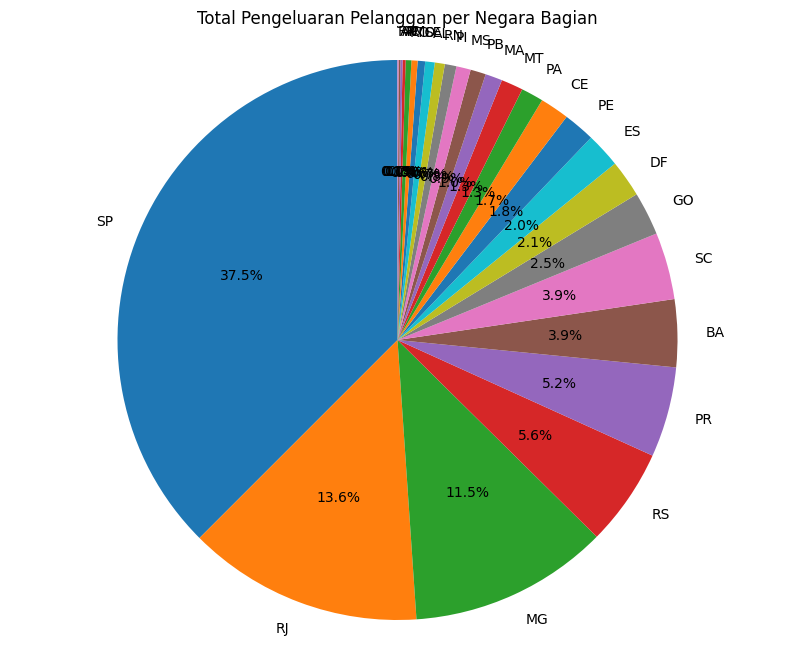

In [ ]:
# Menghitung total pengeluaran per negara bagian
state_payment = all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

# Plot diagram lingkaran untuk total pengeluaran per negara bagian
plt.figure(figsize=(10, 8))
plt.pie(state_payment['payment_value'], labels=state_payment.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Pengeluaran Pelanggan per Negara Bagian')
plt.axis('equal')  # Agar lingkaran tetap bulat
plt.show()


### Pertanyaan 2: Di Mana Pelanggan dengan Pengeluaran Tertinggi Tinggal?

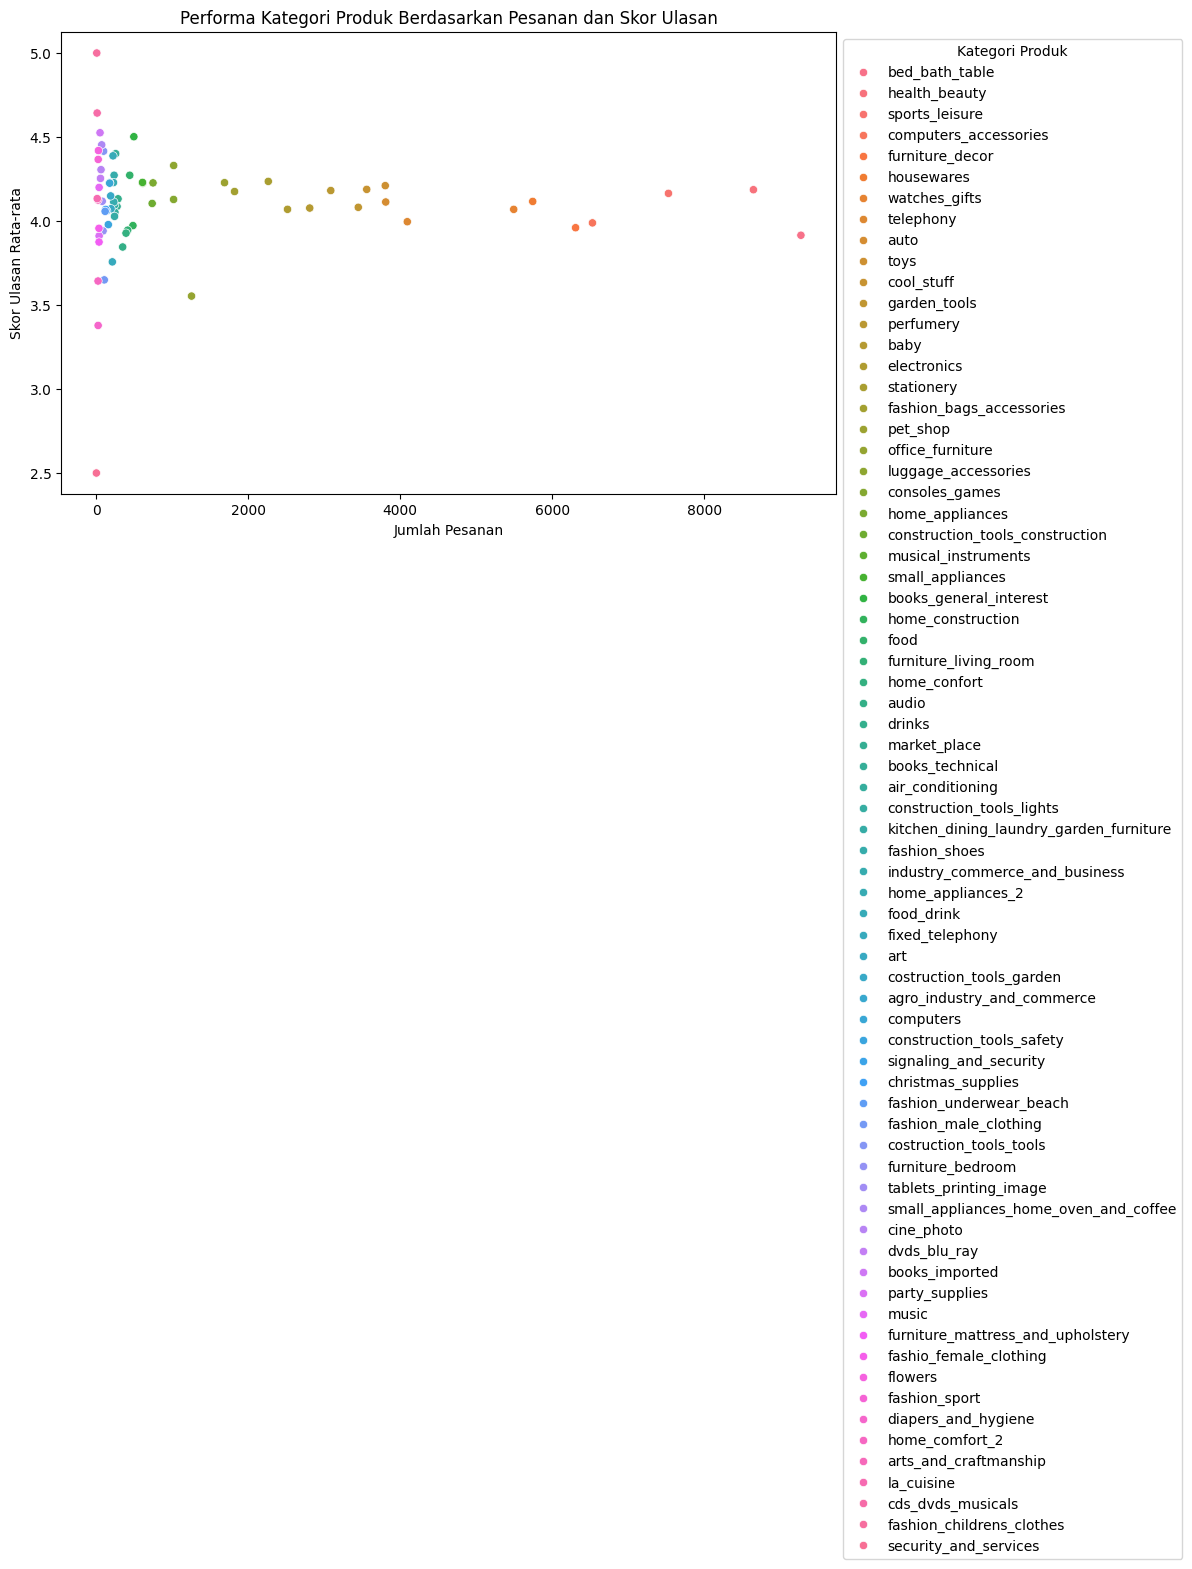

In [ ]:
# Mengelompokkan data berdasarkan kategori produk dan menghitung jumlah pesanan serta skor ulasan
category_review = all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
}).sort_values(by="order_id", ascending=False)

# Plot scatter antara jumlah pesanan dan skor ulasan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=category_review['order_id'], y=category_review['review_score'], hue=category_review.index)
plt.title('Performa Kategori Produk Berdasarkan Pesanan dan Skor Ulasan')
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Skor Ulasan Rata-rata')
plt.legend(title="Kategori Produk", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


### Pertanyaan 3: Apa Pola Pembelian Pelanggan 10 Kota tertinggi?

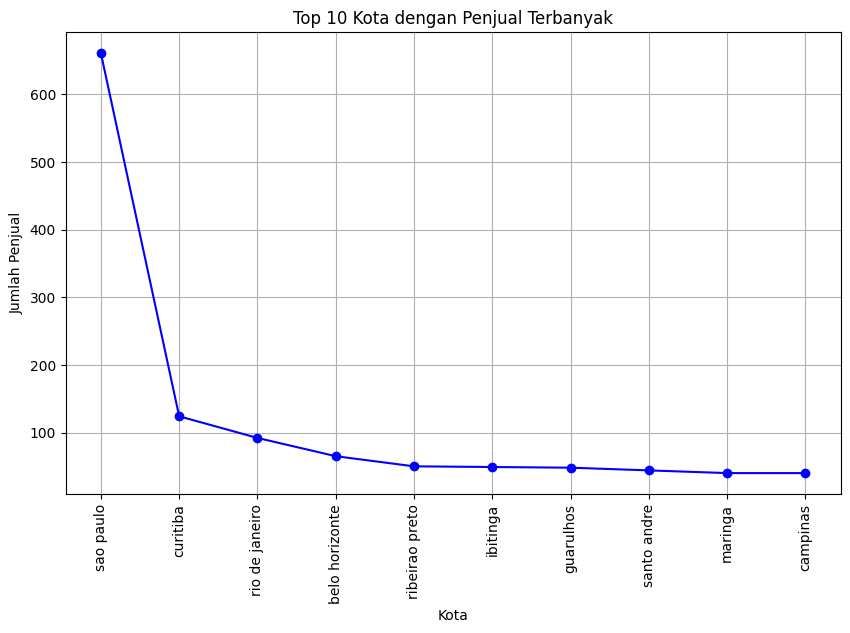

In [ ]:
# Mengelompokkan data berdasarkan kota penjual dan menghitung jumlah penjual unik
top_seller_cities = item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

# Plot jumlah penjual per kota sebagai diagram garis
plt.figure(figsize=(10, 6))
plt.plot(top_seller_cities.index, top_seller_cities.values, marker='o', linestyle='-', color='b')
plt.title('Top 10 Kota dengan Penjual Terbanyak')
plt.xlabel('Kota')
plt.ylabel('Jumlah Penjual')
plt.xticks(rotation=90)
plt.grid()  # Menambahkan grid untuk mempermudah pembacaan
plt.show()


### Pertanyaan 4: Bagaimana Keberadaan Pelanggan Setia di Setiap Wilayah?

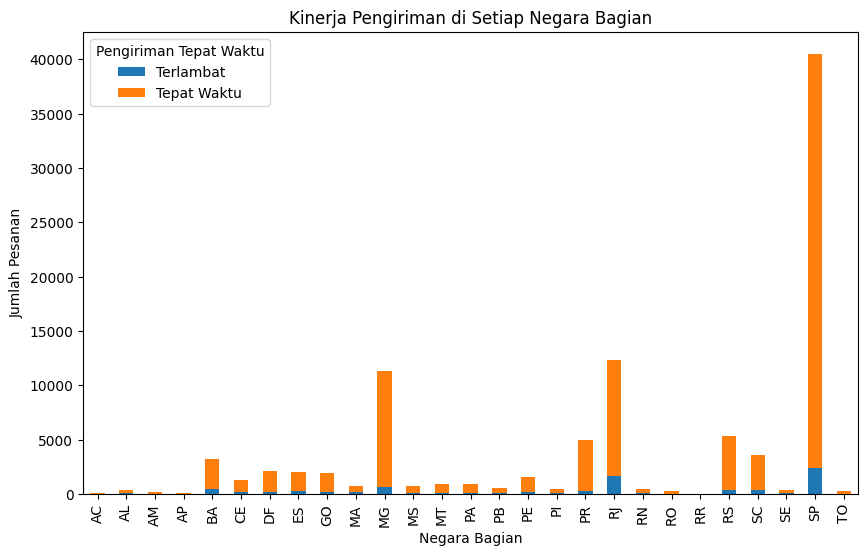

In [ ]:
# Mengelompokkan data berdasarkan negara bagian dan pengiriman tepat waktu
on_time_delivery = all_data.groupby(by=["customer_state", "delivered_on_time"]).agg({
    "order_id": "nunique"
}).unstack().fillna(0)

# Plot stacked bar untuk pengiriman tepat waktu vs terlambat
on_time_delivery.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title('Kinerja Pengiriman di Setiap Negara Bagian')
plt.xlabel('Negara Bagian')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=90)
plt.legend(title="Pengiriman Tepat Waktu", labels=['Terlambat', 'Tepat Waktu'])
plt.show()


# Ekspor data


In [ ]:
output_csv_path = "drive/MyDrive/data/final_processed_data.csv"

# Export the DataFrame to CSV
all_data_df.to_csv(output_csv_path, index=False)

print(f"Data exported successfully to {output_csv_path}")


Data exported successfully to drive/MyDrive/data/final_processed_data.csv


## Conclusion

1. **Wilayah Mana yang Memiliki Pelanggan dengan Total Pengeluaran Tertinggi?**

 >São Paulo dan Rio de Janeiro, sebagai daerah padat penduduk dan pusat ekonomi, memiliki total pengeluaran pelanggan tertinggi, mencerminkan daya beli yang kuat dan aktivitas belanja yang tinggi.

2. **Bagaimana Performa Kategori Produk Berdasarkan Nilai Pesanan dan Skor Ulasan?**
 >Kategori elektronik dan rumah tangga memiliki nilai pesanan tertinggi, sedangkan fashion dan kosmetik mendapatkan ulasan terbaik. Kategori yang lebih mahal tidak selalu memberikan kepuasan tertinggi, meskipun diminati.

3. **Apa Saja Kota dengan Penjual Terbanyak dan Bagaimana Kinerja Mereka?**

 >Kota besar seperti São Paulo dan Rio de Janeiro memiliki penjual terbanyak dan menunjukkan performa penjualan yang kuat, menegaskan peran mereka sebagai pusat utama e-commerce di Brasil.

4. **Bagaimana Kinerja Pengiriman Pesanan di Berbagai Wilayah?**

 >Kota-kota besar di selatan dan tenggara Brasil memiliki tingkat pengiriman tepat waktu yang lebih tinggi, sementara wilayah pedalaman mengalami lebih banyak keterlambatan, menyoroti pentingnya infrastruktur logistik.